In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from cycler import cycler
import scipy.stats as stats

In [3]:
df = pd.read_csv('iso.csv')


In [6]:
combs = set(zip(df['r1_temp'], df['r1_pressure'], df['r2_temp'], df['r2_pressure']))
len(combs)

7440

In [2]:
df = pd.read_excel('Iso.xlsx', sheet_name='Previous worksheet').set_index('Variable')
df.columns = df.loc['R1 FeedTemperature', :]


Text(0.5, 0.98, 'R1 Output Metrics')

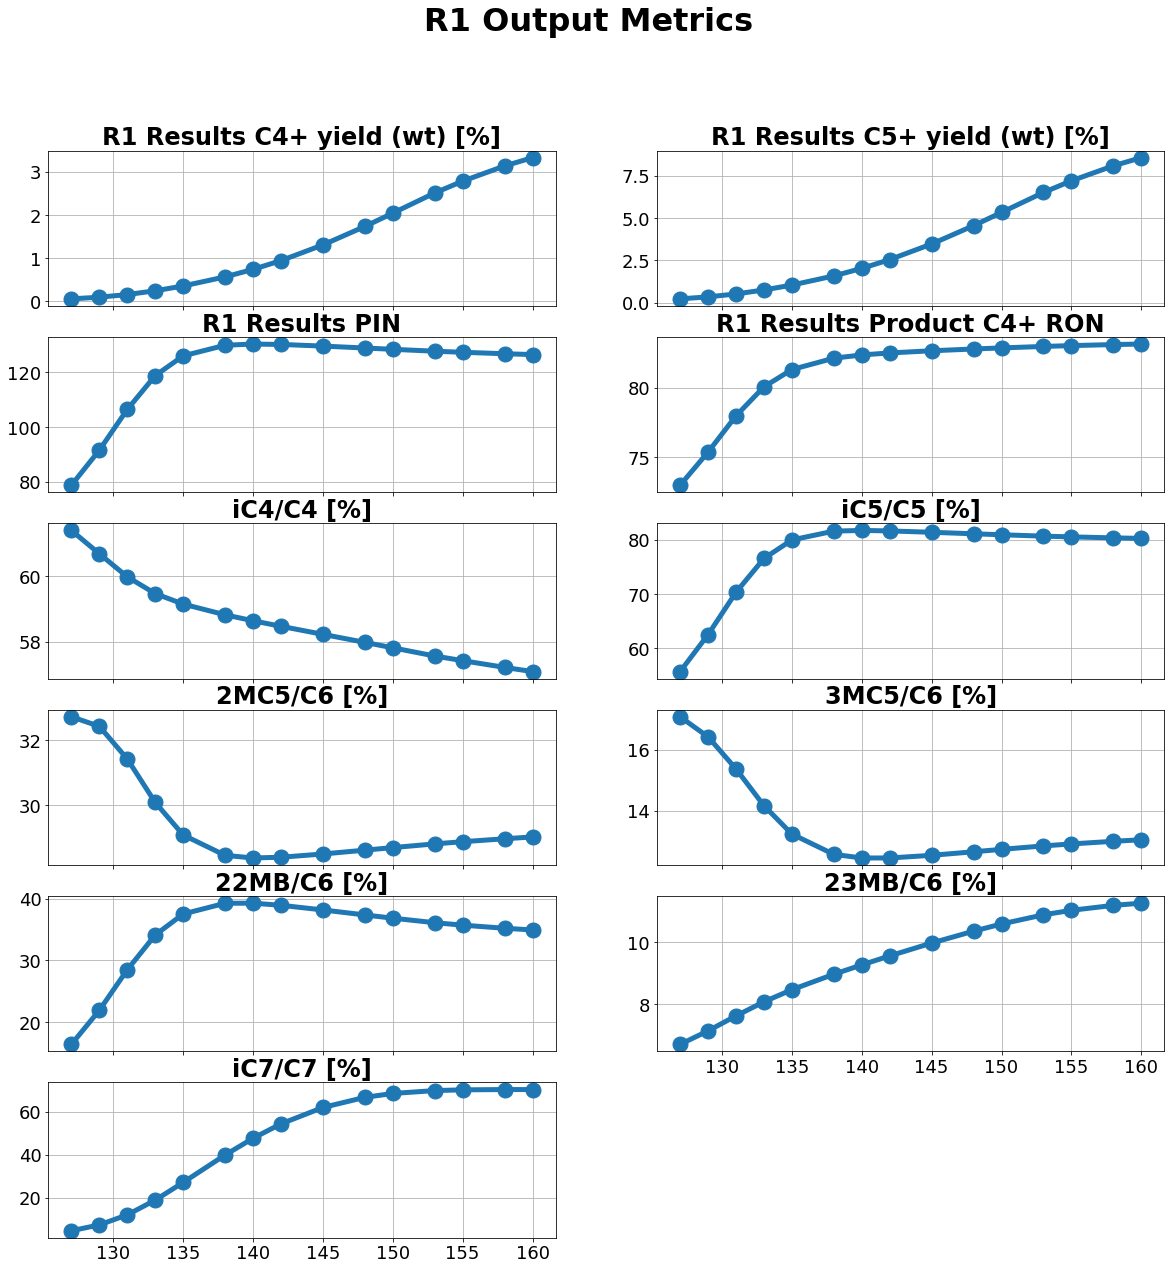

In [3]:
visualization_targets = ['R1 Results C4+ yield (wt) [%]', 'R1 Results C5+ yield (wt) [%]', 
                         'R1 Results PIN', 'R1 Results Product C4+ RON', 'iC4/C4 [%]', 'iC5/C5 [%]', '2MC5/C6 [%]', '3MC5/C6 [%]',
                         '22MB/C6 [%]', '23MB/C6 [%]', 'iC7/C7 [%]']

temps = df.columns[2:]

f, axes = plt.subplots(6, 2, figsize=(20, 20), sharex=False)
axes = axes.flatten()

for i, vt in enumerate(visualization_targets):
    ax = axes[i]
    ax.plot(temps, df.loc[vt, temps], 'o-', markersize=15, linewidth=5)
    ax.set_title(vt, fontsize=24, fontweight='bold')
    ax.tick_params(axis='x', labelsize=18)
    ax.tick_params(axis='y', labelsize=18)
    ax.grid('on')
    if i < len(visualization_targets) - 2:
        plt.setp(ax.get_xticklabels(), visible=False)
f.delaxes(axes[-1])
plt.suptitle('R1 Output Metrics', fontsize=32, fontweight='bold')

Text(0.5, 0.98, 'R2 Output Metrics')

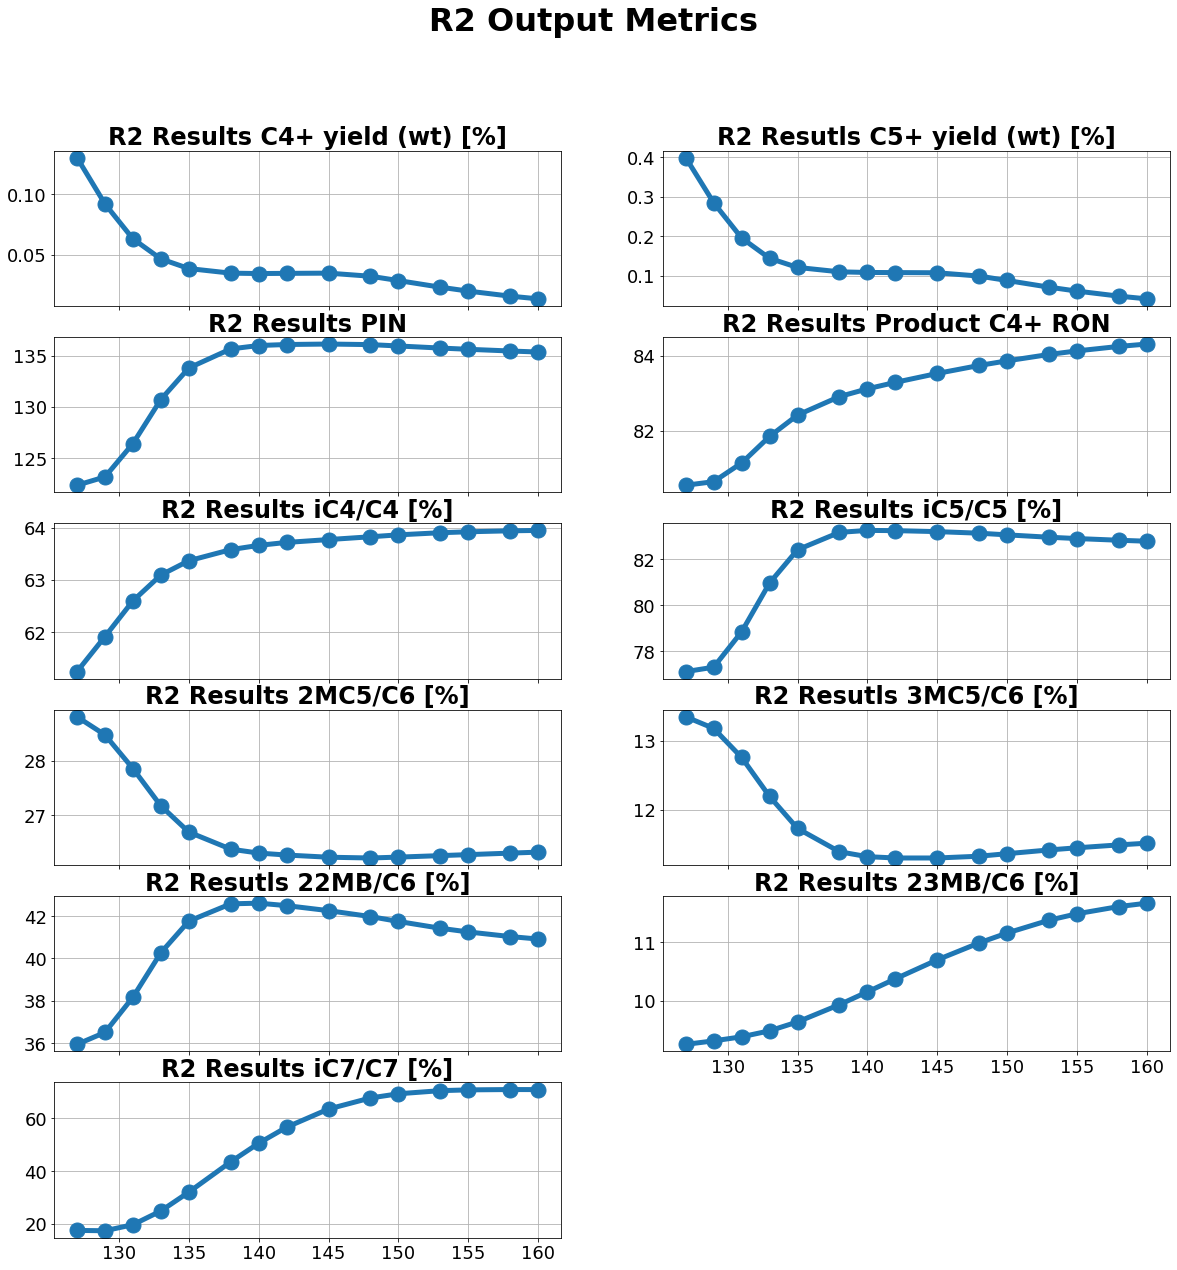

In [4]:
visualization_targets = ['R2 Results C4+ yield (wt) [%]', 
                         'R2 Resutls C5+ yield (wt) [%]', 
                         'R2 Results PIN', 
                         'R2 Results Product C4+ RON', 
                         'R2 Results iC4/C4 [%]',
                         'R2 Results iC5/C5 [%]',
                         'R2 Results 2MC5/C6 [%]',
                         'R2 Resutls 3MC5/C6 [%]',
                         'R2 Resutls 22MB/C6 [%]',
                         'R2 Results 23MB/C6 [%]',
                         'R2 Results iC7/C7 [%]'
                        ]

temps = df.columns[2:]

f, axes = plt.subplots(6, 2, figsize=(20, 20), sharex=False)
axes = axes.flatten()

for i, vt in enumerate(visualization_targets):
    ax = axes[i]
    ax.plot(temps, df.loc[vt, temps], 'o-', markersize=15, linewidth=5)
    ax.set_title(vt, fontsize=24, fontweight='bold')
    ax.tick_params(axis='x', labelsize=18)
    ax.tick_params(axis='y', labelsize=18)
    ax.grid('on')
    if i < len(visualization_targets) - 2:
        plt.setp(ax.get_xticklabels(), visible=False)
f.delaxes(axes[-1])
plt.suptitle('R2 Output Metrics', fontsize=32, fontweight='bold')

# Product Proportions

Text(0.5, 1.0, 'R2 Product Proportions')

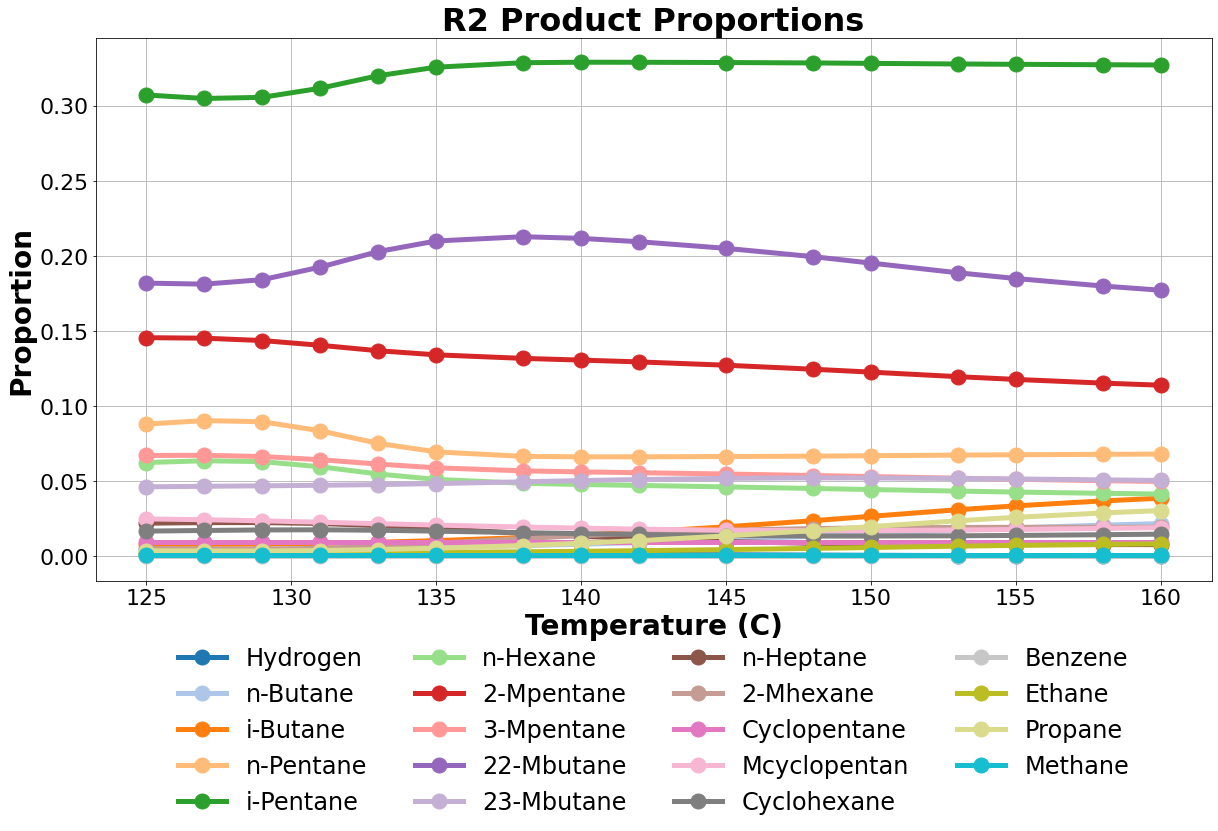

In [5]:
df = pd.read_excel('Iso.xlsx', sheet_name='Cleaned Data').set_index('Variable')
temps = np.array(df.loc['R1 FeedTemperature', df.columns[1::2]]).astype(np.float)
products = [
    "R2 Product Hydrogen",
    "R2 Product n-Butane",
    "R2 Product i-Butane",
    "R2 Product n-Pentane",
    "R2 Product i-Pentane",
    "R2 Product n-Hexane",
    "R2 Product 2-Mpentane",
    "R2 Product 3-Mpentane",
    "R2 Product 22-Mbutane",
    "R2 Product 23-Mbutane",
    "R2 Product n-Heptane",
    "R2 Product 2-Mhexane",
    "R2 Product Cyclopentane",
    "R2 Product Mcyclopentan",
    "R2 Product Cyclohexane",
    "R2 Product Benzene",
    "R2 Product Ethane",
    "R2 Product Propane",
    "R2 Product Methane"
]
plabels = [p.replace('R2 Product ', '') for p in products]

product_colors = [c['color'] for c in  cycler(color=plt.cm.tab20.colors)]
pc = list(zip(products, product_colors, plabels))

f, ax = plt.subplots(1, 1, figsize=(20, 10))
for product, color, lbl in pc:
    ax.plot(temps, df.loc[product, df.columns[2::2]], linewidth=5, linestyle='-', marker='o', markersize=15, color=color, label=lbl)
ax.tick_params(axis='x', labelsize=22)
ax.tick_params(axis='y', labelsize=22)
ax.set_xlabel('Temperature (C)', fontsize=28, fontweight='bold')
ax.set_ylabel('Proportion', fontsize=28, fontweight='bold')
ax.grid(True)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.08), fancybox=False, shadow=False, frameon=False, ncol=4, fontsize=24)
ax.set_title('R2 Product Proportions', fontweight='bold', fontsize=32)

Text(0.5, 1.0, 'Products whose Proportion < 0.1')

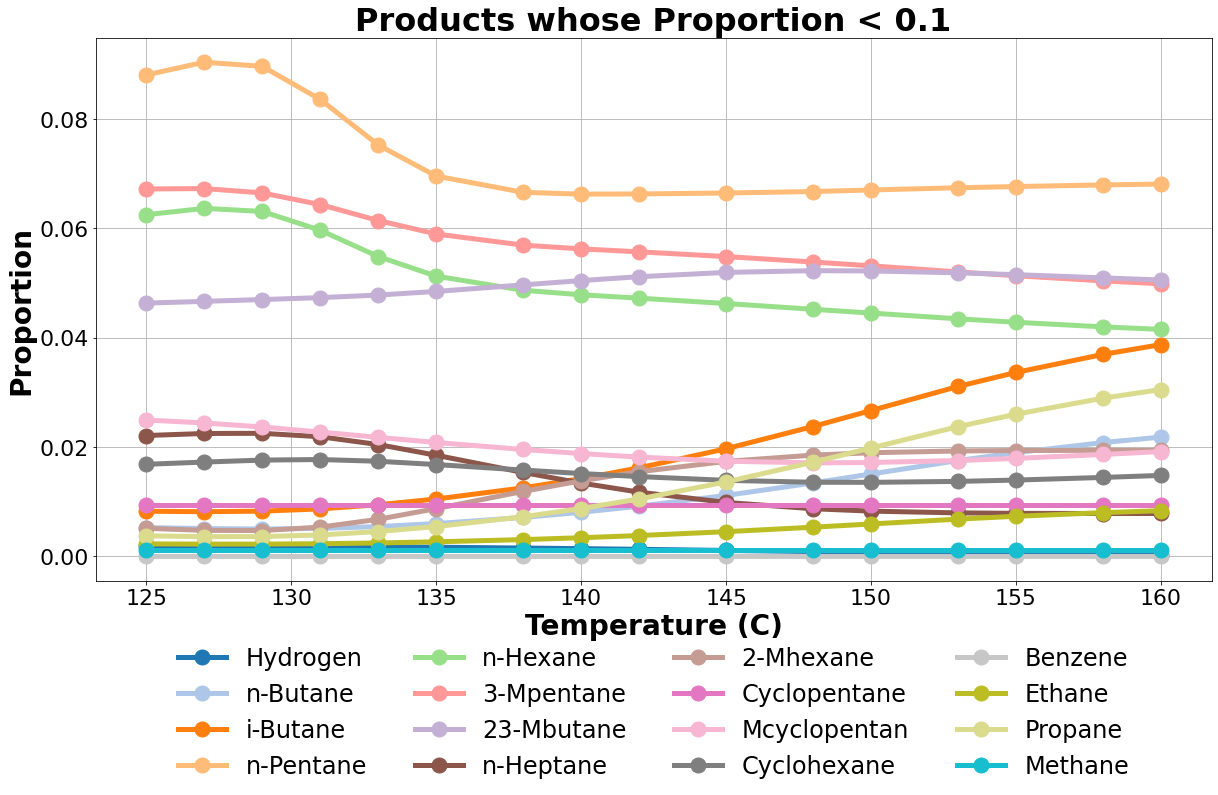

In [6]:
# pick out products where proportion is always less than 0.1
small_prods = [p for p in pc if np.max(df.loc[p[0], df.columns[2::2]]) < 0.1]
f, ax = plt.subplots(1, 1, figsize=(20, 10))

for product, color, lbl in small_prods:
    ax.plot(temps, df.loc[product, df.columns[2::2]], linewidth=5, linestyle='-', marker='o', markersize=15, color=color, label=lbl)
    ax.tick_params(axis='x', labelsize=22)
    ax.tick_params(axis='y', labelsize=22)
    ax.set_xlabel('Temperature (C)', fontsize=28, fontweight='bold')
    ax.set_ylabel('Proportion', fontsize=28, fontweight='bold')
    ax.grid(True)
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.08), fancybox=False, shadow=False, frameon=False, ncol=4, fontsize=24)
ax.set_title('Products whose Proportion < 0.1', fontweight='bold', fontsize=32)

# Spearman Correlations for Each Pair of R2 Products

/Users/mmkhajah/venvs/sci/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


R2 Product Methane has constant value


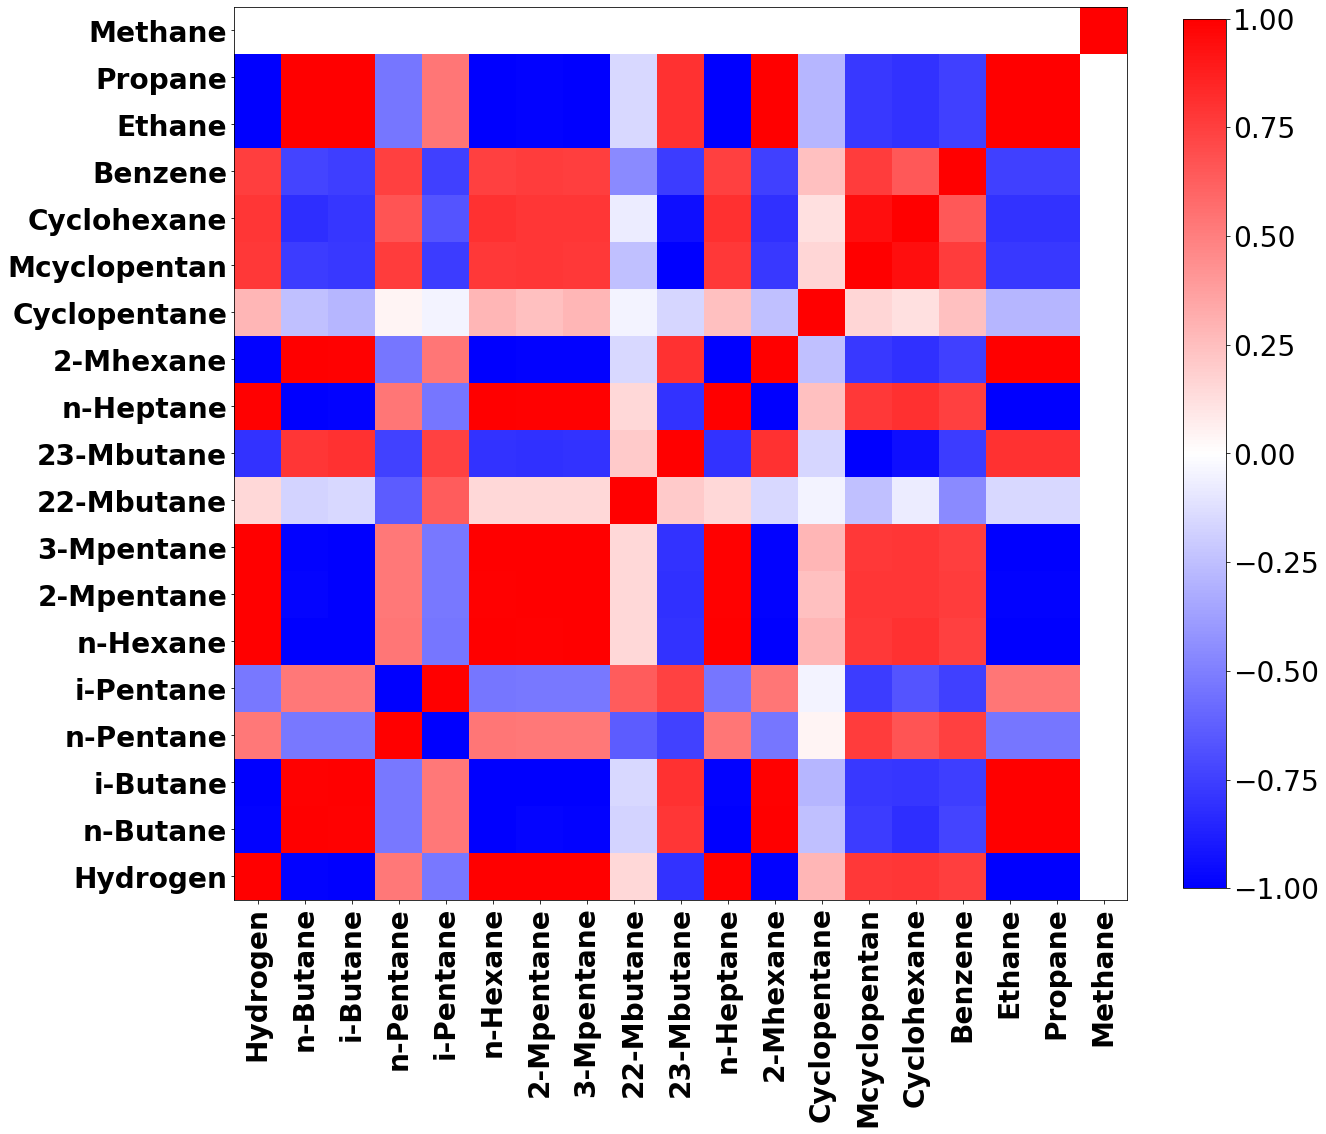

In [7]:
n = len(products)

corr_mat = np.zeros((n, n))
for i in range(n):
    prod_i_props = np.array(df.loc[products[i], df.columns[2::2]])
    for j in range(i, n):
        prod_j_props = np.array(df.loc[products[j], df.columns[2::2]])
        if np.min(prod_i_props) == np.max(prod_j_props):
            rho = 1.0
            print("%s has constant value" % (products[i]))
        else:
            rho, p = stats.spearmanr(prod_i_props, prod_j_props)
        corr_mat[i,j] = rho
        corr_mat[j,i] = rho
        
f, ax = plt.subplots(1, 1, figsize=(20, 20))
im = ax.imshow(corr_mat, origin='lower', cmap='bwr')
ax.set_xticks(np.arange(n))
ax.set_xticklabels(plabels, rotation=90, fontsize=28, fontweight='bold')
ax.set_yticks(np.arange(n))
ax.set_yticklabels(plabels, fontsize=28, fontweight='bold')
cbar = f.colorbar(im, ax=ax, shrink=0.8)
cbar.ax.tick_params(labelsize=28) 

In [9]:
corr_df = pd.DataFrame(corr_mat, columns=plabels, index=plabels)
corr_df.to_excel('tmp/correlation_r1temp_only.xlsx')